# Iniciación en Python con Aplicaciones en Aceración (module 02)

**Dr. Edgar Ivan Castro Cedeño**

[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import desulf # funciones propias

# 2. Coeficiente de reparto de azufre, Ls

## 2.1 Concepto general

**Definición formal**

El coeficiente de reparto de azufre, $L_S$, representa el cociente entre el azufre contenido en la escoria y el azufre contenido en el metal, bajo condiciones de equilibrio termodinánico.

$$L_S = \frac{(\%S)}{[\%S]} \quad \quad \mathrm{En\,Equilibrio}$$

**Utilización empírica en planta**

Dado que las mediciones de contenido de azufre en el metal y en la escoria son relativamente fáciles de analizar en planta, es común que se evalúe este indicador durante el proceso de aceración.


$$L_{S_{emp}} = \frac{(\%S)}{[\%S]} \quad \quad \mathrm{Fuera\,del\,equilibrio}$$

 Sin embargo hay que considerar que el proceso de refinación es transitorio, y que las condiciones del proceso pueden estar fuera del equilibrio al momento de tomar las muestras.



## 2.2 Relación entre el coeficiente de reparto y la capacidad de sulfuro

Se consideran las definiciones de coeficiente de reparto, y de capacidad de sulfuro modificada:

$$L_S = \frac{(\%S)}{[\%S]}$$

$$ C_S' = \left(\%S\right) \frac{\left[h_O\right]}{\left[h_S\right]} $$

Recordando que $h_S = f_s [\%S]$, y sustituyendo en la ecuación se tiene:

$$ C_S' =  \frac{(\%S)}{[\%S]} \frac{h_O}{f_S}$$

$$ C_S' = L_S \frac{h_O}{f_S}$$

Aplicando logarítmos a la ecuación y considerando la relación entre $C_S'$ y $C_S$, se obtiene:

$$\log L_S = \log C_S' + \log f_S - \log h_O$$

$$\log L_S = \underbrace{\log C_S + log K_{1.3}}_{\log C_S'} + \log f_S - \log h_O$$

In [9]:
def logK13(T):
    return -935.0/T + 1.375

In [10]:
def logLs(Cs: float, T: float, fs: float, ho:float) -> float:
    return np.log10(Cs) + logK13(T) + np.log10(fs) - np.log10(ho)

## 2.3 Implicaciones metalúrgicas

$$\log L_S = \underbrace{\log C_S + log K_{1.3}}_{\log C_S'} + \log f_S - \log h_O$$

$$\log K_{1.3} = -\frac{935}{T} + 1.375$$

### 2.3.1 Escoria con una buena capacidad de sulfuros.

La capacidad de sulfuros, $C_S$, es función de la composición química de la escoria y la temperatura.

$$C_S = f(X_i, T)$$

Existen modelos en la literatura para estimar $C_S$, algunos de estos se presentarán en un capítulo posterior.

### 2.3.2 Efecto de la temperatura en la constante de equilibrio $K_{1.3}$

$$\log K_{1.3} = f(T)$$

$$\log K_{1.3} = -\frac{935}{T} + 1.375$$

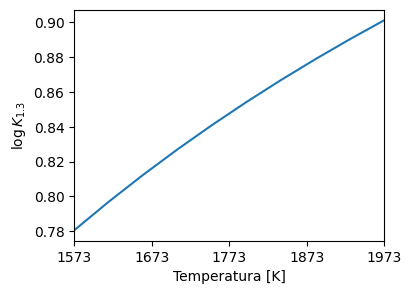

In [11]:
fig, ax = plt.subplots(figsize=(4, 3))

TC = np.linspace(1300, 1700, 10)
TK = TC + 273.15

ax.plot(TK, desulf.logK13(TK))
ax.set_xlim(1573, 1973)
ax.set_xticks([1573, 1673, 1773, 1873, 1973])
ax.set_xlabel('Temperatura [K]')
ax.set_ylabel(r'$\log K_{1.3}$')

plt.show()

### 2.3.3 Efecto de elementos de aleación en el coeficiente de actividad de azufre, $f_S$.

$$f_S = f(\%i, T)$$

$$\log f_i = \sum\limits_{j=2}^{n}{e_i^j \left[\%j\right]} 
        + \sum\limits_{j=2}^n{r_i^j \left[ \%j\right]^2} 
        + \sum\limits_{j=2}^{n-1} \sum\limits_{k>j}^{n} {r_i^{j,k} \left[\%j\right]\left[\%k\right]}$$
        
        
| Símbolo | Descripción |
| --- | --- |
|$e_i^j$     | Coeficiente de interacción de primer orden para el soluto $i$ en presencia del soluto $j$ |
|$r_i^j$     | Coeficiente de interacción de segundo orden para el soluto $i$ en presencia del soluto $j$ |
|$r_i^{j,k}$ | Coeficiente de interacción de segundo orden para el soluto $i$ en presencia de los soluto $j$, $k$ |

**En aceros baja aleación:**

$$f_S \approx 1$$


### 2.3.4 Actividad de oxígeno en el metal, $h_O$.

Una buen nivel de desoxidación en el baño permite una mejor desulfuración

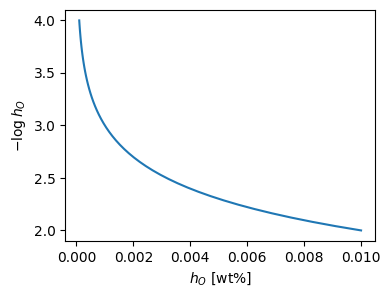

In [12]:
fig, ax = plt.subplots(figsize=(4, 3))

aO = np.logspace(-4, -2, 50)

ax.plot(aO, -np.log10(aO))
ax.set_xlabel(r"$h_O$ [wt%]")
ax.set_ylabel(r"$-\log h_O$")

plt.show()

### 2.3.5 Comparación gráfica

In [13]:
# Sulfide capacity
CS = np.array([1e-3, 1e-2, 1e-1]) # wt%
colors = ['C0', 'C1', 'C2']

# Temperatures
TS = [1673.15, 1873.15] # 1500, 1600 C
linestyles = ['--', '-']

# sulfur activity coefficient
fs = 1

# oxygen activities
ao = np.logspace(-4, -2, 10)  # wt%

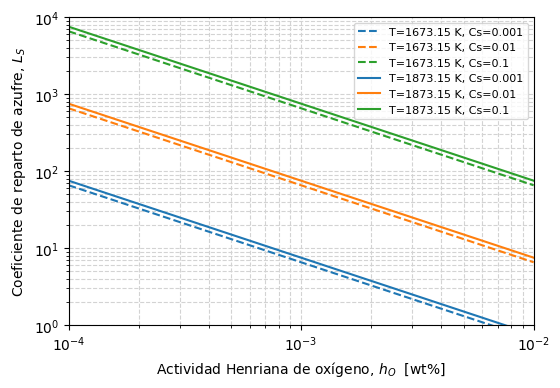

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))

for T, linestyle in zip(TS, linestyles):
    for Cs, color in zip(CS, colors):
        logLs = desulf.logLs(Cs, T, fs, ao)
        Lsline = np.power(10, logLs)
        label = "".join(["T=", str(T), " K, Cs=", str(Cs), ])
        ax.plot(ao, Lsline, label=label,
                ls=linestyle, color=color)

# Format graph
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-4, 1e-2)
ax.set_ylim(1, 1e4)

ax.set_xlabel(r"Actividad Henriana de oxígeno, $h_O$  [wt%]")
ax.set_ylabel(r"Coeficiente de reparto de azufre, $L_S$")


ax.grid(ls='--', which='both', color='lightgray')
ax.legend(fontsize=8)

plt.show()

## 2.4 Referencias

[Slag Atlas (1995)](https://www.stahleisen.de/product/slag-atlas/)  
ed. by VDEh. Verlag Stahleisen GmbH, Düsseldorf.

[The Making, Shaping and Treating of Steel: Steelmaking and Refining Volume (1998)](https://imis.aist.org/store/detail.aspx?id=PB-332)  
ed. by R. J. Fruehan, Association of Iron and Steel Engineers.

[Andersson, M.A., Jönsson, P. G., & Nzotta, M. M. (1999)](https://www.jstage.jst.go.jp/article/isijinternational1989/39/11/39_11_1140/_pdf)  
Application of the sulphide capacity concept on high-basicity ladle slags used in bearing-steel production.  
ISIJ international, 39(11), 1140-1149.

[Secondary Steelmaking: Principles and Applications (2000)](https://doi.org/10.1201/9781420042313)  
GHOSH, Ahindra.
CRC Press.